[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Linear Classifier breast

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 03/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0028LinearClassifier.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import load_breast_cancer

# Image Processing

# Machine Learning


# Miscellaneous
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, List, Tuple

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# from bokeh.plotting import figure, show

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

/tmp/ipykernel_1608987/2547312577.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../../')
from utils.DataVisualization import  Plot2DLinearClassifier, PlotBinaryClassData


In [5]:
# General Auxiliary Functions



In [6]:
# Parameters

# Data Generation


# Data Visualization
numGridPts = 250

## Generate / Load Data

We'll use the [_Breast Cancer Wisconsin (Diagnostic) Data Set_](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

* <font color='blue'>(**!**)</font> Read about the data and its variables.


In [7]:
# Load / Generate Data 
dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')

The features data shape: (569, 30)
The labels data shape: (569,)


In [8]:
## print some demo data
print(f'First 5 rows of the features data:\n{mX[:5]}')
print(f'First 5 rows of the labels data:\n{vY[:5]}')



First 5 rows of the features data:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 

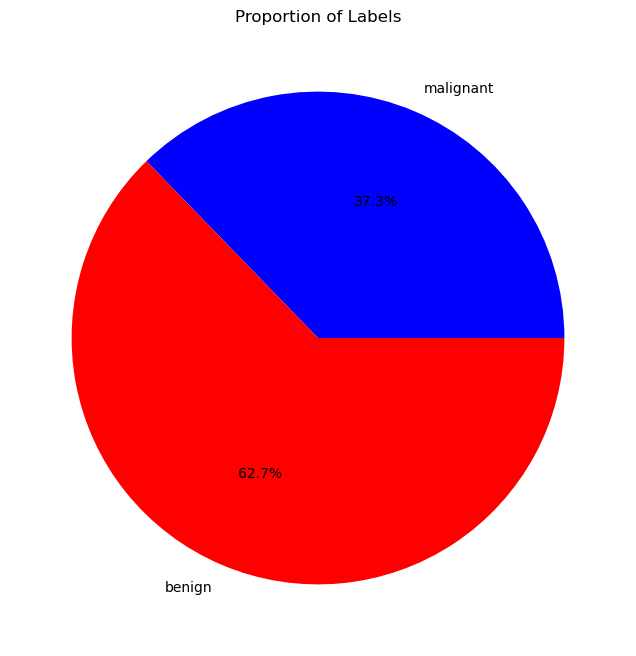

Number of cases with label 0: 212
Number of cases with label 1: 357


In [9]:
## plot cake graph of vY=0 and vY=1
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE_DEF)
ax.pie([np.sum(vY == 0), np.sum(vY == 1)], labels=dData.target_names, autopct='%1.1f%%', colors=CLASS_COLOR)
ax.set_title('Proportion of Labels')
plt.show()

## print count of cases
print(f'Number of cases with label 0: {np.sum(vY == 0)}')
print(f'Number of cases with label 1: {np.sum(vY == 1)}')

In [10]:
# Data Description

print(dData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [11]:
# Features Description

print(dData.feature_names)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


* <font color='brown'>(**#**)</font> [Fractal Dimension](https://en.wikipedia.org/wiki/Fractal_dimension) in this context means how curvy and pointy is the perimeter of the object (Digitized image of a fine needle aspirate (FNA) of a breast mass).

In [12]:
# Labels
print(f'The unique values of the labels: {np.unique(vY)}')

The unique values of the labels: [0 1]


In [13]:
# Pre Process Data

# Standardize Data (Features)
# Make each variable: Zero mean, Unit standard deviation / variance
mX = mX - np.mean(mX, axis = 0)
mX = mX / np.std(mX, axis = 0)

# Transforming the Labels into {-1, 1}
vY[vY == 0] = -1

## print 2 line of demo data
print(f'First 2 rows of the features data:\n{mX[:2]}')
print(f'First 2 rows of the labels data:\n{vY[:2]}')


First 2 rows of the features data:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4

# EDA

In [14]:
# combine mx and vy to df
dfData = pd.DataFrame(data = np.c_[mX, vY], columns = np.append(dData.feature_names, 'label'))
sick_data = dfData[dfData['label'] == -1]
healthy_data = dfData[dfData['label'] == 1]

In [15]:
sick_mean = sick_data.mean()
healthy_mean = healthy_data.mean()
## comine the mean of sick and healthy data to new dataframe
dfMean = pd.DataFrame({'sick': sick_mean, 'healthy': healthy_mean})
dfMean

,sick,healthy
mean radius,0.947340,-0.562566
mean texture,0.538776,-0.319945
mean perimeter,0.963700,-0.572281
mean area,0.920031,-0.546349
mean smoothness,0.465295,-0.276309
mean compactness,0.774107,-0.459694
mean concavity,0.903649,-0.536621
mean concave points,1.007793,-0.598465
mean symmetry,0.428880,-0.254685
mean fractal dimension,-0.016659,0.009893


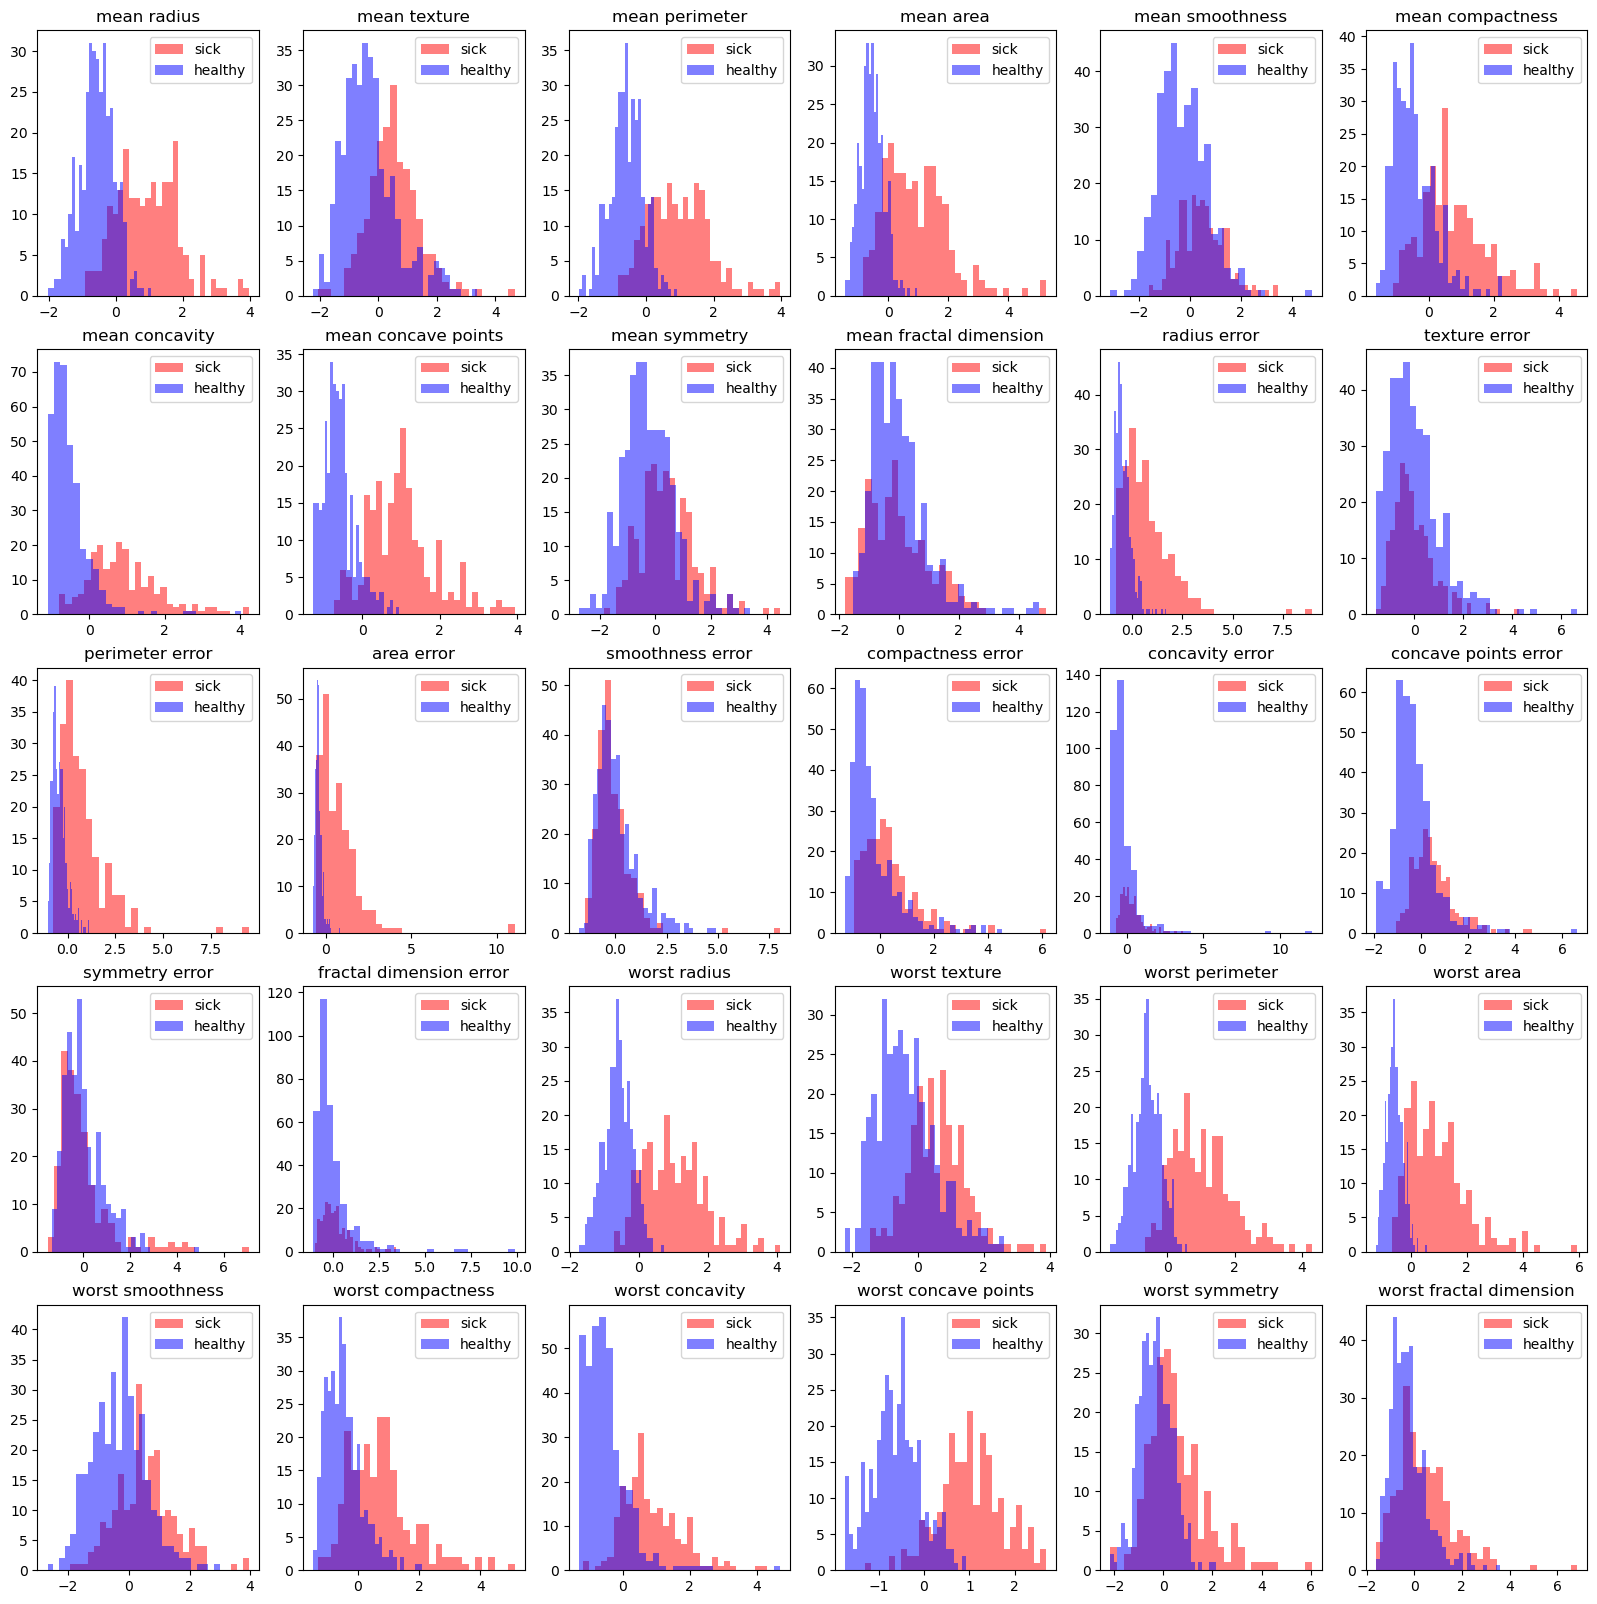

In [16]:
# histogram on every feature
fig, ax = plt.subplots(5, 6, figsize=(20, 20))
for i in range(5):
    for j in range(6):
        ax[i, j].hist(sick_data.iloc[:, i*6+j], bins=30, color='r', alpha=0.5, label='sick')
        ax[i, j].hist(healthy_data.iloc[:, i*6+j], bins=30, color='b', alpha=0.5, label='healthy')
        ax[i, j].set_title(dfData.columns[i*6+j])
        ax[i, j].legend()
plt.show()



# corelation

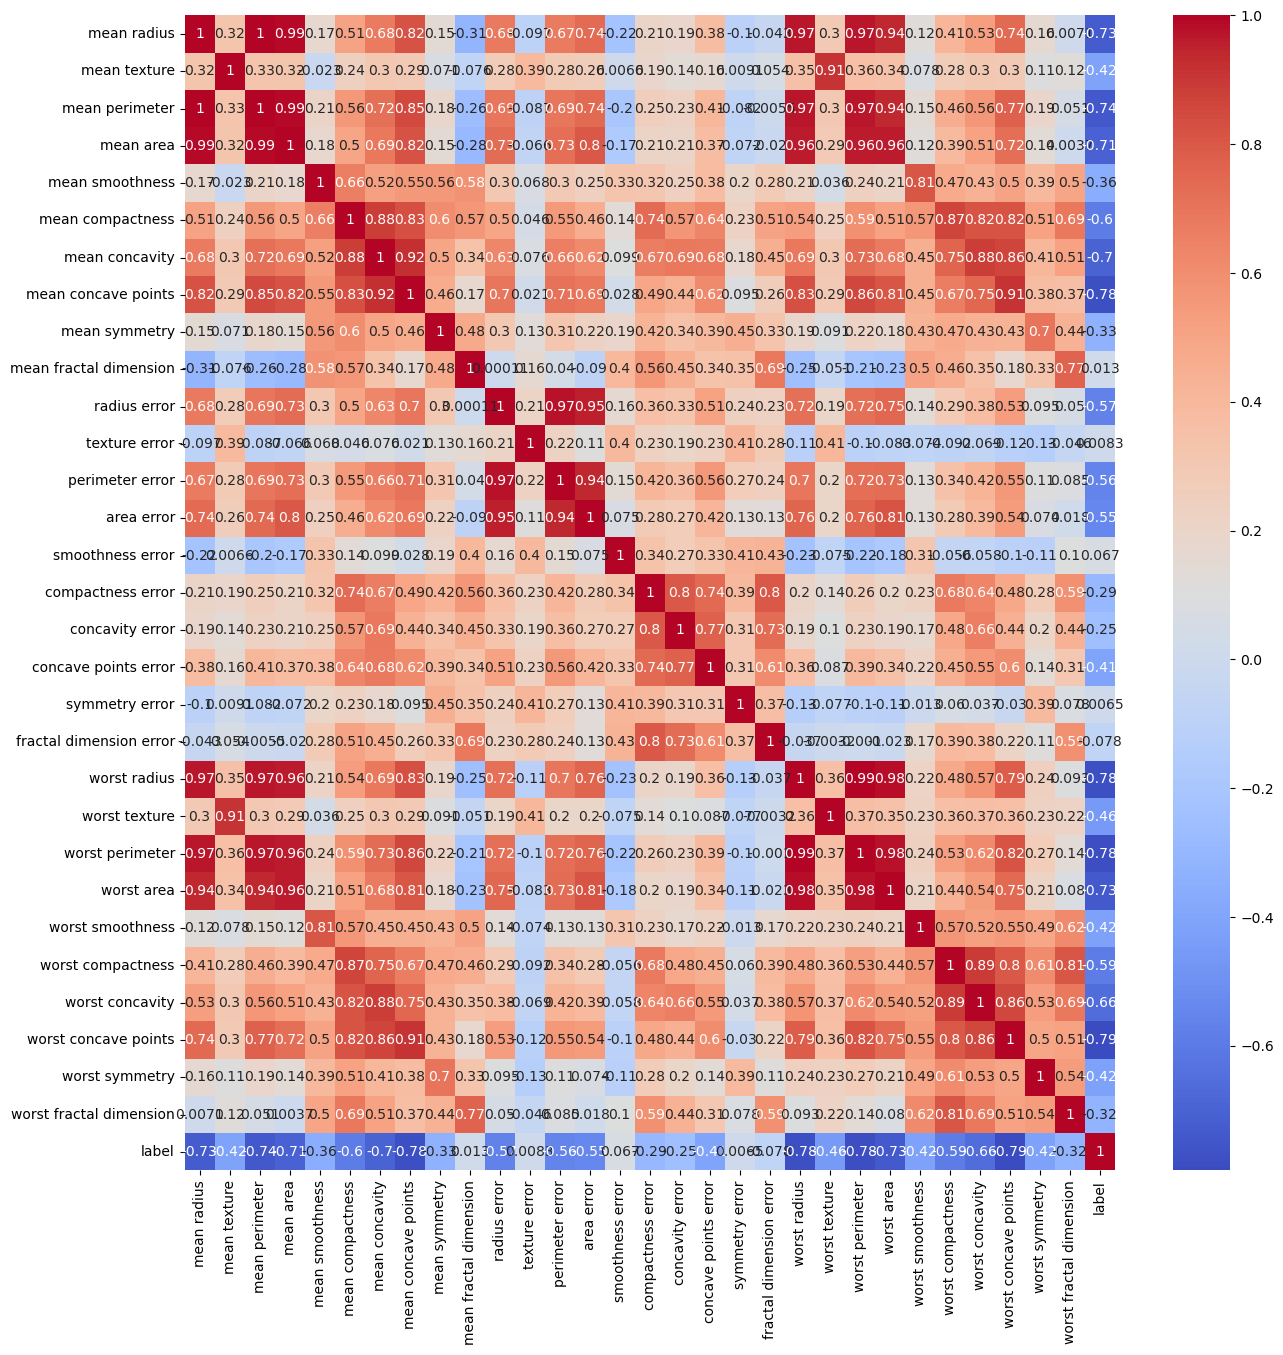

In [31]:
# heatmap corr with half triangle
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(dfData.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()



### Matrix Form of the Data (Parameterization)

We want to add to the features the constant column:

$$
\boldsymbol{X} = \begin{bmatrix}
-1 & - & x_{1} & -\\
-1 & - & x_{2} & -\\
 & \vdots\\
-1 & - & x_{N} & -
\end{bmatrix} \in \mathbb{R}^{N \times 31} $$



Tasks:

* <font color='blue'>(**!**)</font> Set `numSamples` to be the number of samples.  
  You may find `len()` / `np.shape` useful.
* <font color='blue'>(**!**)</font> Update `mX` to the form as above.

Make sure that `mX.shape = (569, 31)`.

In [17]:
#===========================Fill This===========================#
numSamples  = mX.shape[0]
mX          = np.column_stack((-np.ones(numSamples), mX))
#===============================================================#

print(f'numSamples: {numSamples}')
print(f'The features data shape: {mX.shape}') #>! Should be (569, 31)

numSamples: 569
The features data shape: (569, 31)


* <font color='red'>(**?**)</font> Can the data be plotted? Explain.

### Calculation Building Blocks

 * The [Sigmoid Function](https://en.wikipedia.org/wiki/Sigmoid_function) (Member of the _S Shaped_ function family):

$$ \sigma \left( x \right) = 2 \frac{ \exp \left( x \right) }{ 1 + \exp \left( x \right) } - 1 = 2 \frac{ 1 }{ 1 + \exp \left( -x \right) } - 1 $$

<font color='brown'>(**#**)</font> In practice such function requires numerical stable implementation. Use professionally made implementations if available.   
<font color='brown'>(**#**)</font> See [`scipy.special.expit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html) for $\frac{ 1 }{ 1 + \exp \left( -x \right) }$.

 * The gradient of the Sigmoid function:

$$ \frac{\mathrm{d} \sigma \left( x \right) }{\mathrm{d} x} = 2 \frac{ \exp \left( x \right)}{\left( 1 + \exp \left( x \right) \right)^{2}} = 2 \left( \frac{ 1 }{ 1 + \exp \left( -x \right) } \right) \left( 1 - \frac{ 1 }{ 1 + \exp \left( -x \right) } \right) $$

<font color='brown'>(**#**)</font> For derivation of the last step, see https://math.stackexchange.com/questions/78575.

 * The loss function:

$$ J \left( \boldsymbol{w} \right) = \arg \min_{\boldsymbol{w}} \frac{1}{4 N} {\left\| \sigma \left( \boldsymbol{X} \boldsymbol{w} \right) - \boldsymbol{y} \right\|}_{2}^{2} $$

 * The gradient of the loss function:

$$ \nabla_{\boldsymbol{w}} J \left( \boldsymbol{w} \right) = \frac{1}{2N} \boldsymbol{X}^{T} \operatorname{Diag} \left( {\sigma}^{'} \left( \boldsymbol{X} \boldsymbol{w} \right) \right) \left( \sigma \left( \boldsymbol{X} \boldsymbol{w}\right) - \boldsymbol{y} \right) $$

 * The accuracy function:

$$ \text{Accuracy} = \frac{1}{N} \sum_{i = 1}^{N} \mathbb{I} \left\{ \hat{y}_{i} = y_{i} \right\}, \; \text{Where} \; \hat{y}_{i} = \operatorname{sign} \left( \boldsymbol{w}^{T} \boldsymbol{x}_{i} \right) $$

 * The Gradient Descent step:

$$ \boldsymbol{w}_{k + 1} = \boldsymbol{w}_{k} - \mu \nabla_{\boldsymbol{w}} J \left( \boldsymbol{w}_{k} \right) $$

In [18]:
# Defining the Functions

def SigmoidFun( vX: np.ndarray ) -> np.ndarray:
    
    return (2 * sp.special.expit(vX)) - 1

def GradSigmoidFun(vX: np.ndarray) -> np.ndarray:

    vExpit = sp.special.expit(vX)
    
    return 2 * vExpit * (1 - vExpit)

def LossFun(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray):

    numSamples = mX.shape[0]

    vR = SigmoidFun(mX @ vW) - vY
    
    return np.sum(np.square(vR)) / (4 * numSamples)

def GradLossFun(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray) -> np.ndarray:

    numSamples = mX.shape[0]
    
    return (mX.T * GradSigmoidFun(mX @ vW).T) @ (SigmoidFun(mX @ vW) - vY) / (2 * numSamples)

def CalcAccuracy(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray):
    
    vHatY = np.sign(mX @ vW)
    
    return np.mean(vHatY == vY)

## Training the Model (Linear Classifier for Binary Classification)

In this section we'll implement the training phase using Gradient Descent.

**Remark**: You should get `~98%`.

* <font color='brown'>(**#**)</font> Pay attention to the function `CalcAccuracy()`. You may use it.


In [19]:
# Parameters

#===========================Fill This===========================#
K   = 2000 #<! Num Steps
µ   = 0.1 #<! Step Size
vW  = np.random.rand(31)
print(f'Initial weights: {vW}')
 #<! Initial w
#===============================================================#

mW = np.zeros(shape = (vW.shape[0], K)) #<! Model Parameters (Weights)
vE = np.full(shape = K, fill_value = None) #<! Errors
vL = np.full(shape = K, fill_value = None) #<! Loss

mW[:, 0]    = vW
vE[0]       = 1 - CalcAccuracy(mX, vW, vY)
vL[0]       = LossFun(mX, vW, vY)

#===========================Fill This===========================#
for kk in range(1, K):
    vW -= µ * GradLossFun(mX,vW,vY)   #<! Update the weights

    mW[:, kk] = vW
    
    vE[kk] = 1 - CalcAccuracy(mX, vW, vY) #<! Calculate the mean error
    vL[kk] = LossFun(mX, vW, vY) #<! Calculate the loss
#===============================================================#
    
print(f'Final weights: {vW}')

Initial weights: [0.10729586 0.21193693 0.38785171 0.3651425  0.0847786  0.32761275
 0.46994676 0.55937557 0.26139615 0.78219619 0.61786047 0.9017219
 0.80345349 0.02748905 0.67072269 0.44188427 0.96106932 0.33655362
 0.98704907 0.42054738 0.11551123 0.11973692 0.54273345 0.89399355
 0.62676463 0.30810329 0.76770288 0.58571476 0.49516682 0.53606378
 0.73954955]
Final weights: [-0.55225193 -0.62583161 -0.68353507 -0.48754118 -0.77797179 -0.2619799
 -0.14713312 -0.59526531 -0.88866094 -0.04635121  0.56947724 -0.29342642
  0.29577631 -1.02297835 -0.30874225 -0.07971019  0.6639906  -0.19054818
  0.20944012  0.13290115  0.0185641  -0.99846948 -0.86781874 -0.19301151
 -0.45887152 -0.79122481  0.00341105 -0.5787303  -0.72154294 -0.63409807
  0.09299431]


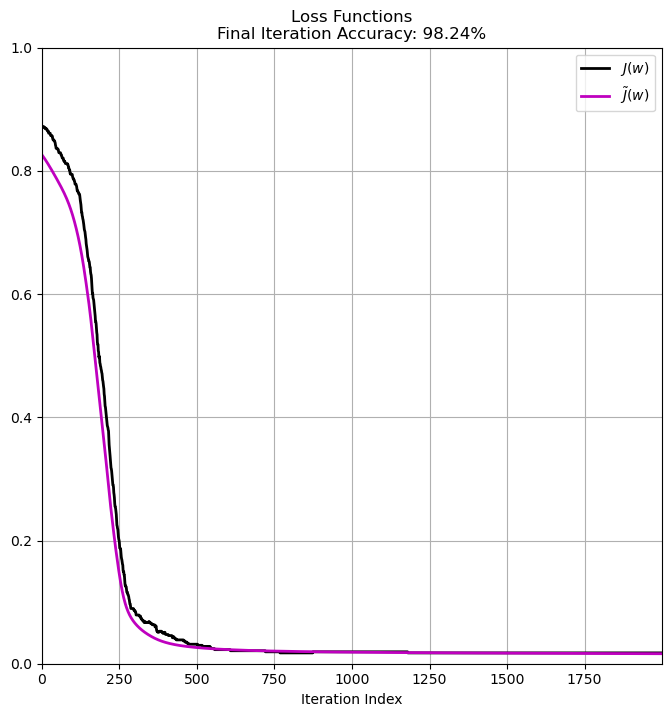

In [20]:
# Plot the Results

accFinal = CalcAccuracy(mX, vW, vY)

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)

hA.plot(vE, color = 'k', lw = 2, label = r'$J \left( w \right)$')
hA.plot(vL, color = 'm', lw = 2, label = r'$\tilde{J} \left( w \right)$')
hA.set_title(f'Loss Functions\nFinal Iteration Accuracy: {CalcAccuracy(mX, vW, vY):0.2%}')
hA.set_xlabel('Iteration Index')
hA.set_xlim((0, K - 1))
hA.set_ylim((0, 1))
hA.grid()
hA.legend()
    
plt.show()

In [21]:
for feature in dData.feature_names:
    print(f'{feature} : {vW[dData.feature_names.tolist().index(feature)]}')

mean radius : -0.5522519280612184
mean texture : -0.6258316138842764
mean perimeter : -0.683535065976039
mean area : -0.4875411750013253
mean smoothness : -0.7779717860179926
mean compactness : -0.26197989966146823
mean concavity : -0.14713312309050885
mean concave points : -0.5952653131697615
mean symmetry : -0.8886609449473933
mean fractal dimension : -0.046351209801405426
radius error : 0.5694772434857023
texture error : -0.2934264190691419
perimeter error : 0.2957763108282323
area error : -1.0229783494443443
smoothness error : -0.3087422516592806
compactness error : -0.07971018599884573
concavity error : 0.6639906017559701
concave points error : -0.19054818287282924
symmetry error : 0.20944012391051722
fractal dimension error : 0.132901152234875
worst radius : 0.018564095750620957
worst texture : -0.9984694834556983
worst perimeter : -0.8678187429253742
worst area : -0.19301151234270797
worst smoothness : -0.4588715178248742
worst compactness : -0.7912248088189952
worst concavity :

## Validate the Gradient Calculation

In order to verify the gradient calculation one may compare it to a numeric approximation of the gradient.  
Usually this is done using the classic [Finite Difference Method](https://en.wikipedia.org/wiki/Finite_difference_method).  
Yet this method requires setting the step size parameter (The `h` parameters in Wikipedia).
Its optimal value depends on $x$ and the function itself.

Yet there is a nice trick called _Complex Step Differentiation_ which goes like:

$$ \frac{\mathrm{d} f \left( x \right) }{\mathrm{d} x} \approxeq \frac{1}{\varepsilon} \Im \left[ f \left( x + i \varepsilon \right) \right] $$

This approximation is less sensitive to the choice of the step size $\varepsilon$.

 * <font color='brown'>(**#**)</font> The tricky part of this method is the complex extension of the functions.  
   for instance, instead of `np.sum(np.abs(vX))` use `np.sum(np.sqrt(vX ** 2))`.
 * <font color='brown'>(**#**)</font> Usually setting `ε = 1e-8` will do the work.

___________
see the complex trick on 01_mathIntro/matCalc/numericAlternative/0007NumericDiff.ipynb
_________

In [22]:
# Numerical Calculation of the Gradient by the Complex Step Trick

def CalcFunGrad( hF, vX, ε = 1e-8 ):

    numElements = vX.shape[0]
    
    vY = hF(vX)
    vG = np.zeros(numElements) #<! Gradient
    vP = np.zeros(numElements) #<! Perturbation
    vZ = np.array(vX, dtype = complex)

    for ii in range(numElements):
        vP[ii]  = ε
        vZ.imag = vP
        vG[ii]  = np.imag(hF(vZ)) / ε
        vP[ii]  = 0
    
    return vG


In [23]:
# Updating Functions to Support Complex Input

def SigFunComplex( vX: np.ndarray ) -> np.ndarray:

    return 1 / (1 + np.exp(-vX))


def SigmoidFunComplex( vX: np.ndarray ) -> np.ndarray:
    
    return (2 * SigFunComplex(vX)) - 1


def LossFunComplex(mX: np.ndarray, vW: np.ndarray, vY: np.ndarray):

    numSamples = mX.shape[0]

    vR = SigmoidFunComplex(mX @ vW) - vY
    
    return np.sum(np.square(vR)) / (4 * numSamples)

In [24]:
# Calculating the Gradient Numerically

ε = 1e-8
 
hL = lambda vW: LossFunComplex(mX, vW, vY)

vW = np.random.rand(mX.shape[1])
vG = CalcFunGrad(hL, vW, ε) #<! Numerical gradient

In [25]:
# Verifying the complex variation of the loss function matches the reference 

maxError = np.max(np.abs(LossFunComplex(mX, vW, vY) - LossFun(mX, vW, vY)))
print(f'The maximum absolute deviation of the complex variation: {maxError}')

The maximum absolute deviation of the complex variation: 0.0


In [26]:
# Verifying the analytic gradient vs. the complex step differentiation

maxError = np.max(np.abs(GradLossFun(mX, vW, vY) - vG))
print(f'The maximum absolute deviation of the numerical gradient: {maxError}') #<! We expect it to be less than 1e-8 for Float64

The maximum absolute deviation of the numerical gradient: 1.734723475976807e-17
